Задание 1

Изучите утренние и вечерние часы пик.

Постройте график с количеством заказов по суточным часам (на оси Х - часы от 0 до 23).

In [336]:
import pandas as pd

In [337]:
data = pd.read_csv('Data_Skytaxi.csv', sep = ';')
data.head()

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN
1,1146340,114,11,02.08.2022 19:12,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50
2,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16
3,1137227,111,17,03.08.2022 15:45,NaN,NaN,NaN
4,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          10020 non-null  int64 
 1   id_tariff         10020 non-null  int64 
 2   id_city           10020 non-null  int64 
 3   order_time        10020 non-null  object
 4   assign_time       6743 non-null   object
 5   arrive_time       5345 non-null   object
 6   ride_finish_time  4834 non-null   object
dtypes: int64(3), object(4)
memory usage: 548.1+ KB


In [339]:
hours_list = []
for date in data['order_time']:
    if len(date) == 15:
        hours_list.append(date[11])
    if len(date) == 16:
        hours_list.append(date[11:13])

In [340]:
hours_list = [int(i) for i in hours_list]

In [341]:
data['order_time_hour'] = hours_list

In [342]:
data

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,7
1,1146340,114,11,02.08.2022 19:12,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50,19
2,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,13
3,1137227,111,17,03.08.2022 15:45,NaN,NaN,NaN,15
4,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,15
...,...,...,...,...,...,...,...,...
10015,1139224,112,11,02.08.2022 8:52,02.08.2022 8:59,NaN,NaN,8
10016,1140346,111,15,03.08.2022 8:48,NaN,NaN,NaN,8
10017,1138341,111,12,07.08.2022 0:35,NaN,NaN,NaN,0
10018,1145927,112,11,04.08.2022 3:24,04.08.2022 3:29,04.08.2022 3:34,04.08.2022 3:59,3


In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          10020 non-null  int64 
 1   id_tariff         10020 non-null  int64 
 2   id_city           10020 non-null  int64 
 3   order_time        10020 non-null  object
 4   assign_time       6743 non-null   object
 5   arrive_time       5345 non-null   object
 6   ride_finish_time  4834 non-null   object
 7   order_time_hour   10020 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 626.4+ KB


In [344]:
data_gr = data.groupby('order_time_hour')['order_id'].count().reset_index()

In [345]:
data_gr

,order_time_hour,order_id
0,0,212
1,1,232
2,2,217
3,3,192
4,4,205
5,5,220
6,6,347
7,7,811
8,8,764
9,9,801


In [346]:
data_gr.rename(columns = {'order_id':'orders_cnt'}, inplace = True)

In [347]:
data_gr

,order_time_hour,orders_cnt
0,0,212
1,1,232
2,2,217
3,3,192
4,4,205
5,5,220
6,6,347
7,7,811
8,8,764
9,9,801


In [348]:
import seaborn as sns

In [349]:
import matplotlib.pyplot as plt
%matplotlib inline 

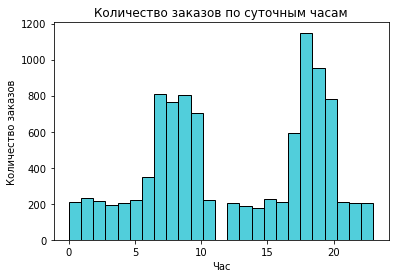

In [350]:
plt.title('Количество заказов по суточным часам')
sns.histplot(data['order_time_hour'], color = 'tab:cyan')
plt.xlabel('Час')
plt.ylabel('Количество заказов')

plt.show()

На сколько за один час в среднем делается больше заказов в часы пик, чем в обычное время? (по всем городам вместе)

In [351]:
data_gr

,order_time_hour,orders_cnt
0,0,212
1,1,232
2,2,217
3,3,192
4,4,205
5,5,220
6,6,347
7,7,811
8,8,764
9,9,801


In [352]:
def rush_hour_flag(hour):
    if hour in np.arange(7,11) or hour in np.arange(17,21):
        return 'rush'
    else:
        return 'non-rush'

In [353]:
data_gr['rush_hour_flag'] = data_gr['order_time_hour'].apply(rush_hour_flag)
data_gr

,order_time_hour,orders_cnt,rush_hour_flag
0,0,212,non-rush
1,1,232,non-rush
2,2,217,non-rush
3,3,192,non-rush
4,4,205,non-rush
5,5,220,non-rush
6,6,347,non-rush
7,7,811,rush
8,8,764,rush
9,9,801,rush


In [354]:
data_rush = data_gr.groupby('rush_hour_flag')['orders_cnt'].mean().reset_index()
data_rush

,rush_hour_flag,orders_cnt
0,non-rush,216.6875
1,rush,819.1250


In [355]:
orders_delta = data_rush['orders_cnt'][1] - data_rush['orders_cnt'][0]
print(f'В среднем за 1 час делается на {orders_delta} заказов больше в часы пик, чем в обычное время')

В среднем за 1 час делается на 602.4375 заказов больше в часы пик, чем в обычное время


Рассмотрите города по отдельности: 
для каждого города выведите разницу в количестве заказов (среднечасовом) между пиковыми и не-пиковыми часами.

In [356]:
city = pd.read_csv('city_dict.csv', sep = ';')
city.head()

,id_city,name_city
0,11,Москва
1,12,Санкт-Петербург
2,13,Казань
3,14,Новосибирск
4,15,Краснодар


In [357]:
data_city = pd.merge(data, city, on = 'id_city')

In [358]:
data_city

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour,name_city
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,7,Казань
1,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,13,Казань
2,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,15,Казань
3,1143569,114,13,04.08.2022 7:55,NaN,NaN,NaN,7,Казань
4,1143908,113,13,05.08.2022 18:28,NaN,NaN,NaN,18,Казань
...,...,...,...,...,...,...,...,...,...
10015,1142728,111,14,05.08.2022 7:26,05.08.2022 7:31,05.08.2022 7:33,05.08.2022 7:44,7,Новосибирск
10016,1146364,111,14,02.08.2022 20:38,02.08.2022 20:43,02.08.2022 20:45,02.08.2022 21:01,20,Новосибирск
10017,1139410,112,14,03.08.2022 18:00,03.08.2022 18:05,03.08.2022 18:12,03.08.2022 18:20,18,Новосибирск
10018,1140852,111,14,05.08.2022 7:12,05.08.2022 7:15,05.08.2022 7:18,05.08.2022 7:31,7,Новосибирск


In [359]:
data_city_gr = data_city.groupby(['name_city', 'order_time_hour'])['order_id'].count().reset_index()

In [360]:
data_city_gr

,name_city,order_time_hour,order_id
0,Екатеринбург,0,19
1,Екатеринбург,1,12
2,Екатеринбург,2,10
3,Екатеринбург,3,14
4,Екатеринбург,4,11
...,...,...,...
211,Хабаровск,19,53
212,Хабаровск,20,60
213,Хабаровск,21,13
214,Хабаровск,22,14


In [361]:
data_city_gr.rename(columns = {'order_id':'orders_cnt'}, inplace = True)

In [362]:
data_city_gr.head()

,name_city,order_time_hour,orders_cnt
0,Екатеринбург,0,19
1,Екатеринбург,1,12
2,Екатеринбург,2,10
3,Екатеринбург,3,14
4,Екатеринбург,4,11


In [363]:
data_city_gr['rush_hour_flag'] = data_city_gr['order_time_hour'].apply(rush_hour_flag)
data_city_gr

,name_city,order_time_hour,orders_cnt,rush_hour_flag
0,Екатеринбург,0,19,non-rush
1,Екатеринбург,1,12,non-rush
2,Екатеринбург,2,10,non-rush
3,Екатеринбург,3,14,non-rush
4,Екатеринбург,4,11,non-rush
...,...,...,...,...
211,Хабаровск,19,53,rush
212,Хабаровск,20,60,rush
213,Хабаровск,21,13,non-rush
214,Хабаровск,22,14,non-rush


In [364]:
data_city_rush = data_city_gr.groupby(['name_city', 'rush_hour_flag'])['orders_cnt'].mean().reset_index()
data_city_rush.rename(columns = {'orders_cnt':'orders_mean'}, inplace = True)
data_city_rush

,name_city,rush_hour_flag,orders_mean
0,Екатеринбург,non-rush,12.4375
1,Екатеринбург,rush,47.8750
2,Казань,non-rush,18.8125
3,Казань,rush,75.7500
4,Краснодар,non-rush,14.9375
5,Краснодар,rush,61.8750
6,Красноярск,non-rush,10.7500
7,Красноярск,rush,41.3750
8,Москва,non-rush,68.6875
9,Москва,rush,251.5000


In [365]:
orders_delta_list = []
for city in data_city_rush['name_city']:
    orders_delta_list.append(data_city_rush[(data_city_rush['name_city'] == city) & (data_city_rush['rush_hour_flag'] == 'rush')]['orders_mean'].item() - data_city_rush[(data_city_rush['name_city'] == city) & (data_city_rush['rush_hour_flag'] == 'non-rush')]['orders_mean'].item()) 
    
data_city_rush['orders_delta'] = orders_delta_list

data_city_rush_gr = data_city_rush.groupby('name_city')['orders_delta'].median().reset_index()
data_city_rush_gr

,name_city,orders_delta
0,Екатеринбург,35.4375
1,Казань,56.9375
2,Краснодар,46.9375
3,Красноярск,30.6250
4,Москва,182.8125
5,Новосибирск,54.5000
6,Санкт-Петербург,119.7500
7,Тюмень,36.6250
8,Хабаровск,38.8125


В каком городе наблюдается наибольшее отклонение конверсии Order2Ride в пиковые часы по сравнению с не-пиковыми часами?

In [366]:
data_city

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour,name_city
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,7,Казань
1,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,13,Казань
2,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,15,Казань
3,1143569,114,13,04.08.2022 7:55,NaN,NaN,NaN,7,Казань
4,1143908,113,13,05.08.2022 18:28,NaN,NaN,NaN,18,Казань
...,...,...,...,...,...,...,...,...,...
10015,1142728,111,14,05.08.2022 7:26,05.08.2022 7:31,05.08.2022 7:33,05.08.2022 7:44,7,Новосибирск
10016,1146364,111,14,02.08.2022 20:38,02.08.2022 20:43,02.08.2022 20:45,02.08.2022 21:01,20,Новосибирск
10017,1139410,112,14,03.08.2022 18:00,03.08.2022 18:05,03.08.2022 18:12,03.08.2022 18:20,18,Новосибирск
10018,1140852,111,14,05.08.2022 7:12,05.08.2022 7:15,05.08.2022 7:18,05.08.2022 7:31,7,Новосибирск


In [367]:
def rush_hour_flag(hour):
    if hour in np.arange(7,11) or hour in np.arange(17,21):
        return 'rush'
    else:
        return 'non-rush'

In [368]:
data_city['rush_hour_flag'] = data_city['order_time_hour'].apply(rush_hour_flag)

In [369]:
data_city

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour,name_city,rush_hour_flag
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,7,Казань,rush
1,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,13,Казань,non-rush
2,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,15,Казань,non-rush
3,1143569,114,13,04.08.2022 7:55,NaN,NaN,NaN,7,Казань,rush
4,1143908,113,13,05.08.2022 18:28,NaN,NaN,NaN,18,Казань,rush
...,...,...,...,...,...,...,...,...,...,...
10015,1142728,111,14,05.08.2022 7:26,05.08.2022 7:31,05.08.2022 7:33,05.08.2022 7:44,7,Новосибирск,rush
10016,1146364,111,14,02.08.2022 20:38,02.08.2022 20:43,02.08.2022 20:45,02.08.2022 21:01,20,Новосибирск,rush
10017,1139410,112,14,03.08.2022 18:00,03.08.2022 18:05,03.08.2022 18:12,03.08.2022 18:20,18,Новосибирск,rush
10018,1140852,111,14,05.08.2022 7:12,05.08.2022 7:15,05.08.2022 7:18,05.08.2022 7:31,7,Новосибирск,rush


In [370]:
data_for_conversion = data_city.groupby(['name_city', 'rush_hour_flag'])[['order_time', 'assign_time', 'arrive_time', 'ride_finish_time']].count().reset_index()
data_for_conversion

,name_city,rush_hour_flag,order_time,assign_time,arrive_time,ride_finish_time
0,Екатеринбург,non-rush,199,149,124,113
1,Екатеринбург,rush,383,288,230,220
2,Казань,non-rush,301,229,179,173
3,Казань,rush,606,458,349,333
4,Краснодар,non-rush,239,189,153,145
5,Краснодар,rush,495,359,304,283
6,Красноярск,non-rush,172,127,109,60
7,Красноярск,rush,331,249,211,135
8,Москва,non-rush,1099,813,648,615
9,Москва,rush,2012,1318,946,890


In [371]:
data_for_conversion.rename(columns = {'order_time':'orders', 'assign_time':'assigns', 'arrive_time':'arrivals', 'ride_finish_time':'rides'}, inplace = True)
data_for_conversion

,name_city,rush_hour_flag,orders,assigns,arrivals,rides
0,Екатеринбург,non-rush,199,149,124,113
1,Екатеринбург,rush,383,288,230,220
2,Казань,non-rush,301,229,179,173
3,Казань,rush,606,458,349,333
4,Краснодар,non-rush,239,189,153,145
5,Краснодар,rush,495,359,304,283
6,Красноярск,non-rush,172,127,109,60
7,Красноярск,rush,331,249,211,135
8,Москва,non-rush,1099,813,648,615
9,Москва,rush,2012,1318,946,890


In [372]:
data_for_conversion['Order2Assign'] = data_for_conversion['assigns'] / data_for_conversion['orders']
data_for_conversion['Assign2Arrive'] = data_for_conversion['arrivals'] / data_for_conversion['assigns']
data_for_conversion['Arrive2Ride'] = data_for_conversion['rides'] / data_for_conversion['arrivals']
data_for_conversion['Order2Ride'] = data_for_conversion['rides'] / data_for_conversion['orders']
data_for_conversion

,name_city,rush_hour_flag,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
0,Екатеринбург,non-rush,199,149,124,113,0.748744,0.832215,0.911290,0.567839
1,Екатеринбург,rush,383,288,230,220,0.751958,0.798611,0.956522,0.574413
2,Казань,non-rush,301,229,179,173,0.760797,0.781659,0.966480,0.574751
3,Казань,rush,606,458,349,333,0.755776,0.762009,0.954155,0.549505
4,Краснодар,non-rush,239,189,153,145,0.790795,0.809524,0.947712,0.606695
5,Краснодар,rush,495,359,304,283,0.725253,0.846797,0.930921,0.571717
6,Красноярск,non-rush,172,127,109,60,0.738372,0.858268,0.550459,0.348837
7,Красноярск,rush,331,249,211,135,0.752266,0.847390,0.639810,0.407855
8,Москва,non-rush,1099,813,648,615,0.739763,0.797048,0.949074,0.559600
9,Москва,rush,2012,1318,946,890,0.655070,0.717754,0.940803,0.442346


In [373]:
max = -1
city_max = ''
for city in data_for_conversion['name_city'].unique():
    O2R_delta = data_for_conversion[(data_for_conversion['name_city'] == city) & (data_for_conversion['rush_hour_flag'] == 'rush')]['Order2Ride'].item() - data_for_conversion[(data_for_conversion['name_city'] == city) & (data_for_conversion['rush_hour_flag'] == 'non-rush')]['Order2Ride'].item()
    if abs(O2R_delta) > max:
        max = abs(O2R_delta)
        city_max = city
print(f'Наибольшее отклонение конверсии Order2Ride в пиковые часы по сравнению с не-пиковыми часами наблюдается в городе {city_max} и составляет', round(max, 4))

Наибольшее отклонение конверсии Order2Ride в пиковые часы по сравнению с не-пиковыми часами наблюдается в городе Москва и составляет 0.1173


In [374]:
O2R_delta_list = []
for city in data_for_conversion['name_city']:
    O2R_delta_list.append(data_for_conversion[(data_for_conversion['name_city'] == city) & (data_for_conversion['rush_hour_flag'] == 'rush')]['Order2Ride'].item() - data_for_conversion[(data_for_conversion['name_city'] == city) & (data_for_conversion['rush_hour_flag'] == 'non-rush')]['Order2Ride'].item())
    
data_for_conversion['O2R_delta'] = O2R_delta_list

data_for_conversion_gr = data_for_conversion.groupby('name_city')['O2R_delta'].median().reset_index()
data_for_conversion_gr['O2R_delta'] = round(data_for_conversion_gr['O2R_delta']*100, 2)
data_for_conversion_gr

,name_city,O2R_delta
0,Екатеринбург,0.66
1,Казань,-2.52
2,Краснодар,-3.50
3,Красноярск,5.90
4,Москва,-11.73
5,Новосибирск,-2.12
6,Санкт-Петербург,-9.29
7,Тюмень,-0.39
8,Хабаровск,6.42


Задание 2

Изучите заказы в Хабаровске и Тюмени. Эти города интересуют менеджеров, так как в них наша компания начала работать относительно недавно.

На сколько процентных пунктов Order2Ride в среднем в них ниже, чем в других городах?

In [375]:
conversion = data_city.groupby(['name_city'])[['order_time', 'assign_time', 'arrive_time', 'ride_finish_time']].count().reset_index()
conversion

,name_city,order_time,assign_time,arrive_time,ride_finish_time
0,Екатеринбург,582,437,354,333
1,Казань,907,687,528,506
2,Краснодар,734,548,457,428
3,Красноярск,503,376,320,195
4,Москва,3111,2131,1594,1505
5,Новосибирск,847,634,525,501
6,Санкт-Петербург,2080,1365,1099,1033
7,Тюмень,632,352,295,169
8,Хабаровск,624,213,173,164


In [376]:
conversion.rename(columns = {'order_time':'orders', 'assign_time':'assigns', 'arrive_time':'arrivals', 'ride_finish_time':'rides'}, inplace = True)
conversion

,name_city,orders,assigns,arrivals,rides
0,Екатеринбург,582,437,354,333
1,Казань,907,687,528,506
2,Краснодар,734,548,457,428
3,Красноярск,503,376,320,195
4,Москва,3111,2131,1594,1505
5,Новосибирск,847,634,525,501
6,Санкт-Петербург,2080,1365,1099,1033
7,Тюмень,632,352,295,169
8,Хабаровск,624,213,173,164


In [377]:
conversion_t_kh = conversion.loc[conversion.name_city.isin(('Тюмень', 'Хабаровск'))]
conversion_t_kh

,name_city,orders,assigns,arrivals,rides
7,Тюмень,632,352,295,169
8,Хабаровск,624,213,173,164


In [378]:
conversion_t_kh['group_column'] = 'Tumen + Khabarovsk'
conversion_t_kh

C:\Users\ddgub\AppData\Local\Temp\ipykernel_11004\3480811165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_t_kh['group_column'] = 'Tumen + Khabarovsk'


,name_city,orders,assigns,arrivals,rides,group_column
7,Тюмень,632,352,295,169,Tumen + Khabarovsk
8,Хабаровск,624,213,173,164,Tumen + Khabarovsk


In [379]:
conversion_two_cities = conversion_t_kh.groupby('group_column', as_index=False).agg({'orders': 'sum', 'assigns': 'sum', 'arrivals': 'sum', 'rides': 'sum'})

In [380]:
conversion_two_cities

,group_column,orders,assigns,arrivals,rides
0,Tumen + Khabarovsk,1256,565,468,333


In [381]:
conversion_others = conversion.loc[-conversion.name_city.isin(('Тюмень', 'Хабаровск'))]
conversion_others

,name_city,orders,assigns,arrivals,rides
0,Екатеринбург,582,437,354,333
1,Казань,907,687,528,506
2,Краснодар,734,548,457,428
3,Красноярск,503,376,320,195
4,Москва,3111,2131,1594,1505
5,Новосибирск,847,634,525,501
6,Санкт-Петербург,2080,1365,1099,1033


In [382]:
conversion_others['group_column'] = 'other cities'
conversion_others

C:\Users\ddgub\AppData\Local\Temp\ipykernel_11004\2355958623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_others['group_column'] = 'other cities'


,name_city,orders,assigns,arrivals,rides,group_column
0,Екатеринбург,582,437,354,333,other cities
1,Казань,907,687,528,506,other cities
2,Краснодар,734,548,457,428,other cities
3,Красноярск,503,376,320,195,other cities
4,Москва,3111,2131,1594,1505,other cities
5,Новосибирск,847,634,525,501,other cities
6,Санкт-Петербург,2080,1365,1099,1033,other cities


In [383]:
conversion_others = conversion_others.groupby('group_column', as_index=False).agg({'orders': 'sum', 'assigns': 'sum', 'arrivals': 'sum', 'rides': 'sum'})

In [384]:
conversion_others

,group_column,orders,assigns,arrivals,rides
0,other cities,8764,6178,4877,4501


In [385]:
conversion_two_cities['Order2Assign'] = conversion_two_cities['assigns'] / conversion_two_cities['orders']
conversion_two_cities['Assign2Arrive'] = conversion_two_cities['arrivals'] / conversion_two_cities['assigns']
conversion_two_cities['Arrive2Ride'] = conversion_two_cities['rides'] / conversion_two_cities['arrivals']
conversion_two_cities['Order2Ride'] = conversion_two_cities['rides'] / conversion_two_cities['orders']
conversion_two_cities

,group_column,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
0,Tumen + Khabarovsk,1256,565,468,333,0.449841,0.828319,0.711538,0.265127


In [386]:
conversion_others['Order2Assign'] = conversion_others['assigns'] / conversion_others['orders']
conversion_others['Assign2Arrive'] = conversion_others['arrivals'] / conversion_others['assigns']
conversion_others['Arrive2Ride'] = conversion_others['rides'] / conversion_others['arrivals']
conversion_others['Order2Ride'] = conversion_others['rides'] / conversion_others['orders']
conversion_others

,group_column,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
0,other cities,8764,6178,4877,4501,0.704929,0.789414,0.922903,0.513578


In [387]:
O2R_delta_cities = conversion_others['Order2Ride'].item() - conversion_two_cities['Order2Ride'].item()

In [388]:
print(f'Order2Ride в среднем в Тюмени и Хабаровске ниже, чем в других городах на', round(O2R_delta_cities*100, 2), 'п.п.')

Order2Ride в среднем в Тюмени и Хабаровске ниже, чем в других городах на 24.85 п.п.


За счет какого звена воронки достигается эта разница? Сделайте выводы по Хабаровску и по Тюмени по отдельности.

In [389]:
conversion_t_kh

,name_city,orders,assigns,arrivals,rides,group_column
7,Тюмень,632,352,295,169,Tumen + Khabarovsk
8,Хабаровск,624,213,173,164,Tumen + Khabarovsk


In [390]:
conversion_t_kh['Order2Assign'] = conversion_t_kh['assigns'] / conversion_t_kh['orders']
conversion_t_kh['Assign2Arrive'] = conversion_t_kh['arrivals'] / conversion_t_kh['assigns']
conversion_t_kh['Arrive2Ride'] = conversion_t_kh['rides'] / conversion_t_kh['arrivals']
conversion_t_kh['Order2Ride'] = conversion_t_kh['rides'] / conversion_t_kh['orders']
conversion_t_kh

C:\Users\ddgub\AppData\Local\Temp\ipykernel_11004\4017663597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_t_kh['Order2Assign'] = conversion_t_kh['assigns'] / conversion_t_kh['orders']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_11004\4017663597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion_t_kh['Assign2Arrive'] = conversion_t_kh['arrivals'] / conversion_t_kh['assigns']
C:\Users\ddgub\AppData\Local\Temp\ipykernel_11004\4017663597.py:3: SettingWithCopyWarning: 
A value is tr

,name_city,orders,assigns,arrivals,rides,group_column,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
7,Тюмень,632,352,295,169,Tumen + Khabarovsk,0.556962,0.838068,0.572881,0.267405
8,Хабаровск,624,213,173,164,Tumen + Khabarovsk,0.341346,0.812207,0.947977,0.262821


In [391]:
conversion_others

,group_column,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
0,other cities,8764,6178,4877,4501,0.704929,0.789414,0.922903,0.513578


In [392]:
#В основном видно, что просадка идет в Order2Assign в обоих городах + в Arrive2Ride в Тюмени

Из рекомендаций - проследить, чтобы в обоих городах заказы назначались водителям, чтобы было достаточное количество
водителей на линии. В Тюмени отдельно подумать над тем, чтобы поездки заканчивались. Машина получается прибывает, но пассажир
не садится и не едет (выяснить почему, может водители долго едут или не туда приезжают?)

Задание 3

К вам обратились коллеги из отдела антифрода (отдела, предотвращающего мошенничество). 
У них есть подозрение, что некоторые водители "мимикрируют координаты", то есть на самом деле не приезжают
в точку А своего заказа, но в приложение посылают сигнал, что они в эту точку А приехали. 
Таким образом они вынуждают клиента отменить заказ после "прибытия ими в точку А".

Постарайтесь локализовать данную проблему и выделить города, в которых такое происходит чаще всего.

In [393]:
conversion

,name_city,orders,assigns,arrivals,rides
0,Екатеринбург,582,437,354,333
1,Казань,907,687,528,506
2,Краснодар,734,548,457,428
3,Красноярск,503,376,320,195
4,Москва,3111,2131,1594,1505
5,Новосибирск,847,634,525,501
6,Санкт-Петербург,2080,1365,1099,1033
7,Тюмень,632,352,295,169
8,Хабаровск,624,213,173,164


In [394]:
conversion['Order2Assign'] = conversion['assigns'] / conversion['orders']
conversion['Assign2Arrive'] = conversion['arrivals'] / conversion['assigns']
conversion['Arrive2Ride'] = conversion['rides'] / conversion['arrivals']
conversion['Order2Ride'] = conversion['rides'] / conversion['orders']
conversion

,name_city,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
0,Екатеринбург,582,437,354,333,0.750859,0.810069,0.940678,0.572165
1,Казань,907,687,528,506,0.757442,0.768559,0.958333,0.557883
2,Краснодар,734,548,457,428,0.746594,0.833942,0.936543,0.583106
3,Красноярск,503,376,320,195,0.747515,0.851064,0.609375,0.387674
4,Москва,3111,2131,1594,1505,0.684989,0.748006,0.944166,0.483767
5,Новосибирск,847,634,525,501,0.748524,0.828076,0.954286,0.591499
6,Санкт-Петербург,2080,1365,1099,1033,0.656250,0.805128,0.939945,0.496635
7,Тюмень,632,352,295,169,0.556962,0.838068,0.572881,0.267405
8,Хабаровск,624,213,173,164,0.341346,0.812207,0.947977,0.262821


In [395]:
conversion['fraud'] = round((1 - conversion['Arrive2Ride'])*100, 2) 
conversion.sort_values(by = 'fraud', ascending = False, inplace = True)

In [396]:
conversion

,name_city,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride,fraud
7,Тюмень,632,352,295,169,0.556962,0.838068,0.572881,0.267405,42.71
3,Красноярск,503,376,320,195,0.747515,0.851064,0.609375,0.387674,39.06
2,Краснодар,734,548,457,428,0.746594,0.833942,0.936543,0.583106,6.35
6,Санкт-Петербург,2080,1365,1099,1033,0.656250,0.805128,0.939945,0.496635,6.01
0,Екатеринбург,582,437,354,333,0.750859,0.810069,0.940678,0.572165,5.93
4,Москва,3111,2131,1594,1505,0.684989,0.748006,0.944166,0.483767,5.58
8,Хабаровск,624,213,173,164,0.341346,0.812207,0.947977,0.262821,5.20
5,Новосибирск,847,634,525,501,0.748524,0.828076,0.954286,0.591499,4.57
1,Казань,907,687,528,506,0.757442,0.768559,0.958333,0.557883,4.17


In [397]:
#В Тюмени и Красноярске 42,71% и 39,06% заказов соответственно, в которых водитель, вероятно, совершает фрод

Задание 4

Тариф "Доставка" был запущен недавно на всей России. 
Изучите конверсии в рамках данного тарифа по городам, локализуйте просадку конверсии Order2Ride в рамках данного тарифа 
и дайте рекомендации отделу операционистов, которые занимаются этим тарифом.

In [398]:
tariff = pd.read_csv('tariff_dict.csv', sep = ';')
tariff

,id_tariff,name_tariff
0,111,Эконом
1,112,Комфорт
2,113,Комфорт+
3,114,Бизнес
4,115,Доставка


In [399]:
df = pd.merge(data_city, tariff, on = 'id_tariff')
df

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour,name_city,rush_hour_flag,name_tariff
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,7,Казань,rush,Эконом
1,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,15,Казань,non-rush,Эконом
2,1137323,111,13,04.08.2022 9:07,NaN,NaN,NaN,9,Казань,rush,Эконом
3,1145573,111,13,06.08.2022 23:33,NaN,NaN,NaN,23,Казань,non-rush,Эконом
4,1142144,111,13,01.08.2022 18:14,NaN,NaN,NaN,18,Казань,rush,Эконом
...,...,...,...,...,...,...,...,...,...,...,...
10015,1137067,115,14,05.08.2022 16:29,05.08.2022 16:38,05.08.2022 16:55,05.08.2022 17:08,16,Новосибирск,non-rush,Доставка
10016,1142641,115,14,04.08.2022 5:24,NaN,NaN,NaN,5,Новосибирск,non-rush,Доставка
10017,1136917,115,14,03.08.2022 2:59,03.08.2022 3:06,03.08.2022 3:25,03.08.2022 3:35,2,Новосибирск,non-rush,Доставка
10018,1146236,115,14,01.08.2022 7:18,01.08.2022 7:22,01.08.2022 7:42,01.08.2022 7:54,7,Новосибирск,rush,Доставка


In [400]:
df = df[df['name_tariff'] == 'Доставка']
df

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour,name_city,rush_hour_flag,name_tariff
9365,1140485,115,13,04.08.2022 8:30,NaN,NaN,NaN,8,Казань,rush,Доставка
9366,1143658,115,13,05.08.2022 7:12,NaN,NaN,NaN,7,Казань,rush,Доставка
9367,1146695,115,13,03.08.2022 18:28,03.08.2022 18:32,03.08.2022 18:51,03.08.2022 19:04,18,Казань,rush,Доставка
9368,1146342,115,13,07.08.2022 7:46,07.08.2022 7:51,07.08.2022 8:11,07.08.2022 8:22,7,Казань,rush,Доставка
9369,1146481,115,13,03.08.2022 10:33,03.08.2022 10:37,NaN,NaN,10,Казань,rush,Доставка
...,...,...,...,...,...,...,...,...,...,...,...
10015,1137067,115,14,05.08.2022 16:29,05.08.2022 16:38,05.08.2022 16:55,05.08.2022 17:08,16,Новосибирск,non-rush,Доставка
10016,1142641,115,14,04.08.2022 5:24,NaN,NaN,NaN,5,Новосибирск,non-rush,Доставка
10017,1136917,115,14,03.08.2022 2:59,03.08.2022 3:06,03.08.2022 3:25,03.08.2022 3:35,2,Новосибирск,non-rush,Доставка
10018,1146236,115,14,01.08.2022 7:18,01.08.2022 7:22,01.08.2022 7:42,01.08.2022 7:54,7,Новосибирск,rush,Доставка


In [401]:
df_gr = df.groupby('name_city')[['order_time', 'assign_time', 'arrive_time', 'ride_finish_time']].count().reset_index()
df_gr

,name_city,order_time,assign_time,arrive_time,ride_finish_time
0,Екатеринбург,47,37,31,28
1,Казань,55,42,34,33
2,Краснодар,2,0,0,0
3,Красноярск,38,31,25,18
4,Москва,220,155,118,112
5,Новосибирск,65,43,39,38
6,Санкт-Петербург,137,100,74,70
7,Тюмень,44,11,8,7
8,Хабаровск,47,16,12,11


In [402]:
df_gr.rename(columns = {'name_city':'city', 'order_time':'orders', 'assign_time':'assigns', 'arrive_time':'arrivals', 'ride_finish_time':'rides'}, inplace = True)

In [403]:
df_gr

,city,orders,assigns,arrivals,rides
0,Екатеринбург,47,37,31,28
1,Казань,55,42,34,33
2,Краснодар,2,0,0,0
3,Красноярск,38,31,25,18
4,Москва,220,155,118,112
5,Новосибирск,65,43,39,38
6,Санкт-Петербург,137,100,74,70
7,Тюмень,44,11,8,7
8,Хабаровск,47,16,12,11


Исключите из рассмотрения города, в которых недостаточно наблюдений для оценки

In [404]:
df_gr = df_gr.drop(index = 2)
df_gr

,city,orders,assigns,arrivals,rides
0,Екатеринбург,47,37,31,28
1,Казань,55,42,34,33
3,Красноярск,38,31,25,18
4,Москва,220,155,118,112
5,Новосибирск,65,43,39,38
6,Санкт-Петербург,137,100,74,70
7,Тюмень,44,11,8,7
8,Хабаровск,47,16,12,11


Посмотрите O2R по городам и выделите города с наименьшим показателем

In [405]:
df_gr['Order2Assign'] = df_gr['assigns'] / df_gr['orders']
df_gr['Assign2Arrive'] = df_gr['arrivals'] / df_gr['assigns']
df_gr['Arrive2Ride'] = df_gr['rides'] / df_gr['arrivals']
df_gr['Order2Ride'] = df_gr['rides'] / df_gr['orders']
df_gr

,city,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
0,Екатеринбург,47,37,31,28,0.787234,0.837838,0.903226,0.595745
1,Казань,55,42,34,33,0.763636,0.809524,0.970588,0.600000
3,Красноярск,38,31,25,18,0.815789,0.806452,0.720000,0.473684
4,Москва,220,155,118,112,0.704545,0.761290,0.949153,0.509091
5,Новосибирск,65,43,39,38,0.661538,0.906977,0.974359,0.584615
6,Санкт-Петербург,137,100,74,70,0.729927,0.740000,0.945946,0.510949
7,Тюмень,44,11,8,7,0.250000,0.727273,0.875000,0.159091
8,Хабаровск,47,16,12,11,0.340426,0.750000,0.916667,0.234043


In [406]:
df_gr.sort_values(by = 'Order2Ride', ascending = True, inplace = True)
df_gr

,city,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
7,Тюмень,44,11,8,7,0.250000,0.727273,0.875000,0.159091
8,Хабаровск,47,16,12,11,0.340426,0.750000,0.916667,0.234043
3,Красноярск,38,31,25,18,0.815789,0.806452,0.720000,0.473684
4,Москва,220,155,118,112,0.704545,0.761290,0.949153,0.509091
6,Санкт-Петербург,137,100,74,70,0.729927,0.740000,0.945946,0.510949
5,Новосибирск,65,43,39,38,0.661538,0.906977,0.974359,0.584615
0,Екатеринбург,47,37,31,28,0.787234,0.837838,0.903226,0.595745
1,Казань,55,42,34,33,0.763636,0.809524,0.970588,0.600000


In [407]:
#Города с наименьшим показателем - Тюмень и Хабаровск

Посмотрите конверсии-звенья O2R и визуализируйте их с доверительными интервалами для конверсий

In [408]:
df_gr

,city,orders,assigns,arrivals,rides,Order2Assign,Assign2Arrive,Arrive2Ride,Order2Ride
7,Тюмень,44,11,8,7,0.250000,0.727273,0.875000,0.159091
8,Хабаровск,47,16,12,11,0.340426,0.750000,0.916667,0.234043
3,Красноярск,38,31,25,18,0.815789,0.806452,0.720000,0.473684
4,Москва,220,155,118,112,0.704545,0.761290,0.949153,0.509091
6,Санкт-Петербург,137,100,74,70,0.729927,0.740000,0.945946,0.510949
5,Новосибирск,65,43,39,38,0.661538,0.906977,0.974359,0.584615
0,Екатеринбург,47,37,31,28,0.787234,0.837838,0.903226,0.595745
1,Казань,55,42,34,33,0.763636,0.809524,0.970588,0.600000


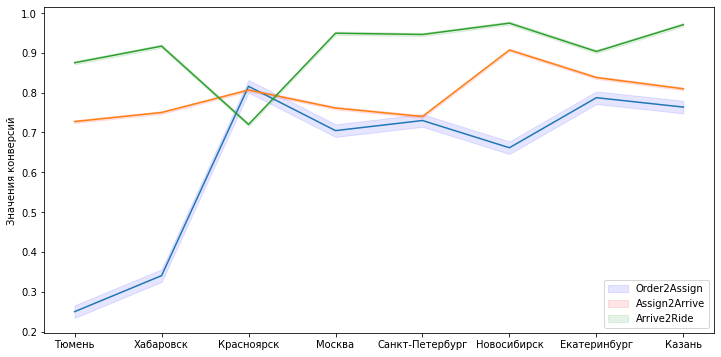

In [409]:
x = df_gr['city']

y1 = df_gr['Order2Assign']
y2 = df_gr['Assign2Arrive']
y3 = df_gr['Arrive2Ride']

ci1 = 0.05 * np.std(y1) / np.mean(y1)
ci2 = 0.05 * np.std(y2) / np.mean(y2)
ci3 = 0.05 * np.std(y3) / np.mean(y3)

plt.figure(figsize=(12,6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.ylabel("Значения конверсий")

plt.fill_between(x, (y1-ci1), (y1+ci1), color='blue', alpha=0.1, label = 'Order2Assign')
plt.fill_between(x, (y2-ci2), (y2+ci2), color='red', alpha=0.1, label = 'Assign2Arrive')
plt.fill_between(x, (y3-ci3), (y3+ci3), color='green', alpha=0.1, label = 'Arrive2Ride')

plt.legend()

plt.show()

Визуализируйте O2R доставки по сравнению с O2R других тарифов

In [410]:
df2 = pd.merge(data_city, tariff, on = 'id_tariff')
df2

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,order_time_hour,name_city,rush_hour_flag,name_tariff
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN,7,Казань,rush,Эконом
1,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26,15,Казань,non-rush,Эконом
2,1137323,111,13,04.08.2022 9:07,NaN,NaN,NaN,9,Казань,rush,Эконом
3,1145573,111,13,06.08.2022 23:33,NaN,NaN,NaN,23,Казань,non-rush,Эконом
4,1142144,111,13,01.08.2022 18:14,NaN,NaN,NaN,18,Казань,rush,Эконом
...,...,...,...,...,...,...,...,...,...,...,...
10015,1137067,115,14,05.08.2022 16:29,05.08.2022 16:38,05.08.2022 16:55,05.08.2022 17:08,16,Новосибирск,non-rush,Доставка
10016,1142641,115,14,04.08.2022 5:24,NaN,NaN,NaN,5,Новосибирск,non-rush,Доставка
10017,1136917,115,14,03.08.2022 2:59,03.08.2022 3:06,03.08.2022 3:25,03.08.2022 3:35,2,Новосибирск,non-rush,Доставка
10018,1146236,115,14,01.08.2022 7:18,01.08.2022 7:22,01.08.2022 7:42,01.08.2022 7:54,7,Новосибирск,rush,Доставка


In [411]:
df2_gr = df2.groupby(['name_city', 'name_tariff'])[['order_time', 'ride_finish_time']].count().reset_index()
df2_gr

,name_city,name_tariff,order_time,ride_finish_time
0,Екатеринбург,Бизнес,51,29
1,Екатеринбург,Доставка,47,28
2,Екатеринбург,Комфорт,132,74
3,Екатеринбург,Комфорт+,69,42
4,Екатеринбург,Эконом,283,160
5,Казань,Бизнес,134,72
6,Казань,Доставка,55,33
7,Казань,Комфорт,211,119
8,Казань,Комфорт+,128,77
9,Казань,Эконом,379,205


In [412]:
df2_gr.rename(columns = {'order_time':'orders', 'ride_finish_time':'rides'}, inplace = True)
df2_gr

,name_city,name_tariff,orders,rides
0,Екатеринбург,Бизнес,51,29
1,Екатеринбург,Доставка,47,28
2,Екатеринбург,Комфорт,132,74
3,Екатеринбург,Комфорт+,69,42
4,Екатеринбург,Эконом,283,160
5,Казань,Бизнес,134,72
6,Казань,Доставка,55,33
7,Казань,Комфорт,211,119
8,Казань,Комфорт+,128,77
9,Казань,Эконом,379,205


In [413]:
df2_gr['Order2Ride'] = df2_gr['rides'] / df2_gr['orders']
df2_gr

,name_city,name_tariff,orders,rides,Order2Ride
0,Екатеринбург,Бизнес,51,29,0.568627
1,Екатеринбург,Доставка,47,28,0.595745
2,Екатеринбург,Комфорт,132,74,0.560606
3,Екатеринбург,Комфорт+,69,42,0.608696
4,Екатеринбург,Эконом,283,160,0.565371
5,Казань,Бизнес,134,72,0.537313
6,Казань,Доставка,55,33,0.600000
7,Казань,Комфорт,211,119,0.563981
8,Казань,Комфорт+,128,77,0.601562
9,Казань,Эконом,379,205,0.540897


In [414]:
df_delivery = df2_gr[df2_gr['name_tariff'] == 'Доставка']
df_delivery

,name_city,name_tariff,orders,rides,Order2Ride
1,Екатеринбург,Доставка,47,28,0.595745
6,Казань,Доставка,55,33,0.600000
11,Краснодар,Доставка,2,0,0.000000
16,Красноярск,Доставка,38,18,0.473684
21,Москва,Доставка,220,112,0.509091
26,Новосибирск,Доставка,65,38,0.584615
31,Санкт-Петербург,Доставка,137,70,0.510949
36,Тюмень,Доставка,44,7,0.159091
41,Хабаровск,Доставка,47,11,0.234043


In [415]:
df_business = df2_gr[df2_gr['name_tariff'] == 'Бизнес']
df_business

,name_city,name_tariff,orders,rides,Order2Ride
0,Екатеринбург,Бизнес,51,29,0.568627
5,Казань,Бизнес,134,72,0.537313
10,Краснодар,Бизнес,123,74,0.601626
15,Красноярск,Бизнес,3,0,0.000000
20,Москва,Бизнес,490,232,0.473469
25,Новосибирск,Бизнес,91,46,0.505495
30,Санкт-Петербург,Бизнес,297,144,0.484848
35,Тюмень,Бизнес,102,18,0.176471
40,Хабаровск,Бизнес,95,32,0.336842


In [416]:
df_comfort = df2_gr[df2_gr['name_tariff'] == 'Комфорт']
df_comfort

,name_city,name_tariff,orders,rides,Order2Ride
2,Екатеринбург,Комфорт,132,74,0.560606
7,Казань,Комфорт,211,119,0.563981
12,Краснодар,Комфорт,187,102,0.545455
17,Красноярск,Комфорт,128,48,0.375000
22,Москва,Комфорт,730,361,0.494521
27,Новосибирск,Комфорт,219,142,0.648402
32,Санкт-Петербург,Комфорт,510,255,0.500000
37,Тюмень,Комфорт,132,45,0.340909
42,Хабаровск,Комфорт,144,9,0.062500


In [417]:
df_comfort_plus = df2_gr[df2_gr['name_tariff'] == 'Комфорт+']
df_comfort_plus

,name_city,name_tariff,orders,rides,Order2Ride
3,Екатеринбург,Комфорт+,69,42,0.608696
8,Казань,Комфорт+,128,77,0.601562
13,Краснодар,Комфорт+,117,73,0.623932
18,Красноярск,Комфорт+,65,23,0.353846
23,Москва,Комфорт+,410,201,0.490244
28,Новосибирск,Комфорт+,96,51,0.531250
33,Санкт-Петербург,Комфорт+,247,121,0.489879
38,Тюмень,Комфорт+,79,16,0.202532
43,Хабаровск,Комфорт+,77,6,0.077922


In [418]:
df_economy = df2_gr[df2_gr['name_tariff'] == 'Эконом']
df_economy

,name_city,name_tariff,orders,rides,Order2Ride
4,Екатеринбург,Эконом,283,160,0.565371
9,Казань,Эконом,379,205,0.540897
14,Краснодар,Эконом,305,179,0.586885
19,Красноярск,Эконом,269,106,0.394052
24,Москва,Эконом,1261,599,0.475020
29,Новосибирск,Эконом,376,224,0.595745
34,Санкт-Петербург,Эконом,889,443,0.498313
39,Тюмень,Эконом,275,83,0.301818
44,Хабаровск,Эконом,261,106,0.406130


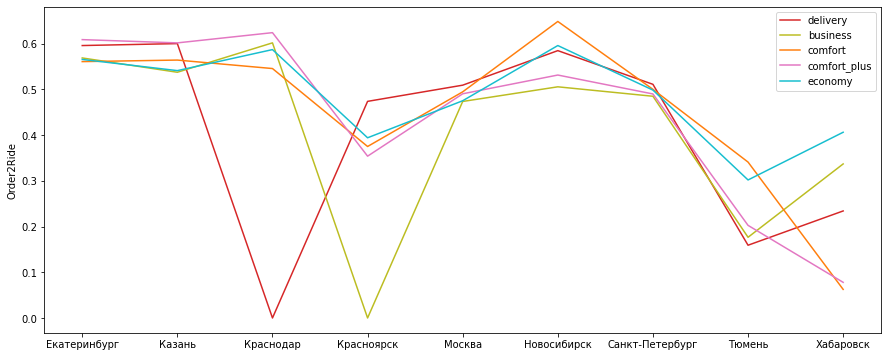

In [419]:
x = df_delivery['name_city']

y1 = df_delivery['Order2Ride']
y2 = df_business['Order2Ride']
y3 = df_comfort['Order2Ride']
y4 = df_comfort_plus['Order2Ride']
y5 = df_economy['Order2Ride']

plt.figure(figsize=(15,6))

plt.plot(x, y1, color='tab:red', label = 'delivery')
plt.plot(x, y2, color='tab:olive', label = 'business')
plt.plot(x, y3, color='tab:orange', label = 'comfort')
plt.plot(x, y4, color='tab:pink', label = 'comfort_plus')
plt.plot(x, y5, color='tab:cyan', label = 'economy')

plt.ylabel('Order2Ride')

plt.legend()

plt.show()